In [1]:
"""
This code shows an example for using the imported data from a modified
.mat file into a artificial neural network and its training
"""

'\nThis code shows an example for using the imported data from a modified\n.mat file into a artificial neural network and its training\n'

In [74]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

In [80]:
#this function reads the file 
def read_data(archive, rows, columns):
    data = open(archive, 'r')
    mylist = data.read().split()
    data.close()
    myarray = np.array(mylist).reshape(( rows, columns)).astype(float)
    return myarray
    

In [105]:
data = read_data('set.txt',72, 12)
X = data[:, [0, 2, 4, 6, 7, 8, 9, 10, 11]]
#print pre_X.shape, data.shape
y  = data[:,1]
#print y.shape
time_stamp = np.zeros(data.shape[0])
for i in xrange(data.shape[0]):
        time_stamp[i] = i*(1.0/60.0)
#print X.shape, time_stamp.shape
X = np.hstack((X, time_stamp.reshape((X.shape[0], 1))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
t_test = X_test[:,-1]
X_train_std = preprocessing.scale(X_train[:,0:-1])
X_test_std = preprocessing.scale(X_test[:, 0:-1])

In [106]:
 #  Artificial Neural Network
reg = MLPRegressor(hidden_layer_sizes=(40),activation='tanh', algorithm='sgd', alpha=0.01, learning_rate='constant',
                   max_iter=10000, random_state=None, verbose=False, warm_start=False, momentum=0.8, tol=10e-8, shuffle=False)

reg.fit(X_train_std, y_train)

MLPRegressor(activation='tanh', algorithm='sgd', alpha=0.01,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=40, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, tol=1e-07, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [107]:
vector_sorted = np.hstack(
    (t_test.reshape(X_test_std.shape[0], 1), X_test_std, y_test.reshape(X_test_std.shape[0], 1)))
#print vector_results.shape
vector_sorted = np.sort(vector_sorted,axis=0)

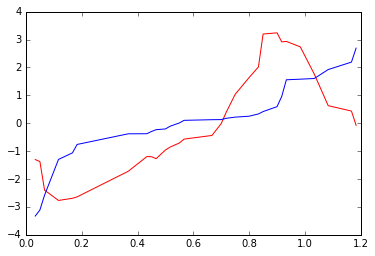

Accuracy: 0.640697149849


In [108]:
%matplotlib inline
results = reg.predict(vector_sorted[:, 1:-1])
plt.plot(vector_sorted[:, 0], results, c='r') # ( sorted time, results)
plt.plot(vector_sorted[:, 0], vector_sorted[:,-1], c='b')

plt.show()
print "Accuracy:", reg.score(X_test_std, y_test)

In [17]:
#example for handling examples of  matrices
x = np.array([[1, 2], [3, 4], [5, 6]])
print x, '\n\n'
print x[:, 1]
print x[:, 0].reshape(3,1)
print x[:, -1]

[[1 2]
 [3 4]
 [5 6]] 


[2 4 6]
[[1]
 [3]
 [5]]
[2 4 6]


In [34]:
print 72.0/60.0


1.2


In [46]:
print time_stamp, '\n\n'
print t_test


[ 0.          0.01666667  0.03333333  0.05        0.06666667  0.08333333
  0.1         0.11666667  0.13333333  0.15        0.16666667  0.18333333
  0.2         0.21666667  0.23333333  0.25        0.26666667  0.28333333
  0.3         0.31666667  0.33333333  0.35        0.36666667  0.38333333
  0.4         0.41666667  0.43333333  0.45        0.46666667  0.48333333
  0.5         0.51666667  0.53333333  0.55        0.56666667  0.58333333
  0.6         0.61666667  0.63333333  0.65        0.66666667  0.68333333
  0.7         0.71666667  0.73333333  0.75        0.76666667  0.78333333
  0.8         0.81666667  0.83333333  0.85        0.86666667  0.88333333
  0.9         0.91666667  0.93333333  0.95        0.96666667  0.98333333
  1.          1.01666667  1.03333333  1.05        1.06666667  1.08333333
  1.1         1.11666667  1.13333333  1.15        1.16666667  1.18333333] 


[ 0.06666667  0.11666667  0.36666667  0.43333333  0.45        0.46666667
  0.5         0.51666667  0.55        0.5666666

In [ ]:
time